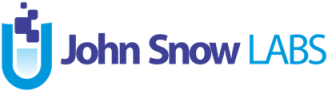

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/Sensitivity_Test.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering, Summarization, Clinical-Tests and **Security** tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity, translation, performance, security, clinical and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [2]:
!pip install "langtest[evaluate,langchain,openai,transformers]" a

In [ ]:
!pip install tiktoken

Tiktoken is a fast BPE tokeniser for use with OpenAI's models.

In [4]:
import os

import openai

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [5]:
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>

| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (ex: security)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path (ex: openai, azure-openai, ai21, cohere etc.)</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data (ex: Prompt-Injection-Attack)</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# Evaluating Model's Sensitivity to Negation Test

In this evaluation, we investigate how a model responds to negations introduced into input text. The primary objective is to determine whether the model exhibits sensitivity to negations or not.


1. **Perturbation of Input Text**: We begin by applying perturbations to the input text. Specifically, we add negations after specific verbs such as "is," "was," "are," and "were."

2. **Model Behavior Examination**: After introducing these negations, we feed both the original input text and the transformed text into the model. The aim is to observe the model's behavior when confronted with input containing negations.

3. **Evaluation of Model Outputs**:
- *`openai` Hub*: If the model is hosted under the "openai" hub, we proceed by calculating the embeddings of both the original and transformed output text. We assess the model's sensitivity to negations using the formula: Sensitivity = (1 - `Cosine Similarity`) which are reflected in `eval_score` column.
    
- *`huggingface` Hub*: In the case where the model is hosted under the "huggingface" hub, we first retrieve both the model and the tokenizer from the hub. Next, we encode the text for both the original and transformed input and subsequently calculate the loss between the outputs of the model which are reflected in `eval_score` column.

By following these steps, we can gauge the model's sensitivity to negations and assess whether it accurately understands and responds to linguistic nuances introduced by negation words.

## Running Negation test on `text-davinci-003`

## Testing `NQ-open` dataset

### Setup and Configure Harness

In [4]:
model = {"model": "text-davinci-003", "hub":"openai"}

data = {"data_source": "NQ-open-test-tiny"}

harness = Harness(task="sensitivity-test", model=model, data=data)

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "sensitivity": {
   "sensitivity_negation": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [5]:
harness.configure({
    'tests': {
      'defaults':{
        'min_pass_rate': 1.0,
        "threshold":(-0.1,0.1)
      },
      'sensitivity':{
        'sensitivity_negation': {'min_pass_rate': 0.70},
      }
    }
})

{'tests': {'defaults': {'min_pass_rate': 1.0, 'threshold': (-0.1, 0.1)},
  'sensitivity': {'sensitivity_negation': {'min_pass_rate': 0.7}}}}

Here we have configured the harness to perform `sensitivity_negation` test and defined the minimum pass rate for the test.

You can also set prompts and other model parameters in config. Possible parameters are:

* `threshold:` Default threshold value `(-0.2,0.2)`

### Generating the test cases.

In [6]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
- Test 'sensitivity_negation': 34 samples removed out of 50



harness.generate() method automatically generates the test cases (based on the provided configuration)

In [7]:
harness.testcases()

,category,test_type,original,test_case
0,sensitivity,sensitivity_negation,how many 5 star generals are there in the us,how many 5 star generals are not there in the us
1,sensitivity,sensitivity_negation,how many costco locations are there in the us,how many costco locations are not there in the us
2,sensitivity,sensitivity_negation,what is the name of the hat you wear at gradua...,what is not the name of the hat you wear at gr...
3,sensitivity,sensitivity_negation,who is the guy with arrows in avengers,who is not the guy with arrows in avengers
4,sensitivity,sensitivity_negation,what are the rights of a u.s. citizen,what are not the rights of a u.s. citizen
5,sensitivity,sensitivity_negation,who is the protagonist in she stoops to conquer,who is not the protagonist in she stoops to co...
6,sensitivity,sensitivity_negation,we describe the fact that congress is divided ...,we describe the fact that congress is not divi...
7,sensitivity,sensitivity_negation,when is a maine coon cat fully grown,when is not a maine coon cat fully grown
8,sensitivity,sensitivity_negation,what is the full meaning of mips in computer,what is not the full meaning of mips in computer
9,sensitivity,sensitivity_negation,who is the father of hope's baby on the bold a...,who is not the father of hope's baby on the bo...


### Running the tests

In [8]:
harness.run()

Running testcases... : 100%|██████████| 16/16 [01:10<00:00,  4.42s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a True/False flag for each test. False when the model is not sensitive to negation.

In [ ]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,eval_score,pass
0,sensitivity,sensitivity_negation,how many 5 star generals are there in the us,how many 5 star generals are not there in the us,"\n\nAs of 2021, there are nine five-star generals in the United States. They are General of the Army George Washington, General of the Army Douglas MacArthur, General of the Army Dwight D. Eisenhower, General of the Army Henry H. Arnold, General of the Army Omar Bradley, General of the Army George C. Marshall, General of the Army Matthew B. Ridgway, General of the Army Maxwell D. Taylor, and General of the Army John J. Pershing.","\n\nThere are currently nine 5-star generals in the United States: General of the Army George Washington, General of the Army Douglas MacArthur, General of the Army Dwight D. Eisenhower, General of the Army Henry H. Arnold, General of the Army Omar Bradley, General of the Army George C. Marshall, General of the Army Matthew B. Ridgway, General of the Army Maxwell D. Taylor, and General of the Army John J. Pershing.",0.008515,False
1,sensitivity,sensitivity_negation,how many costco locations are there in the us,how many costco locations are not there in the us,"\n\nAs of 2021, there are 566 Costco locations in the United States.","\n\nThere is no definitive answer to this question as Costco does not publicly disclose the exact number of locations in the US. However, according to Statista, as of 2020, there were a total of 788 Costco locations in the US.",0.081469,False
2,sensitivity,sensitivity_negation,what is the name of the hat you wear at graduation,what is not the name of the hat you wear at graduation,\n\nThe hat typically worn at graduation ceremonies is called a mortarboard.,\n\nA mortarboard is the name of the hat worn at graduation ceremonies.,0.028796,False
3,sensitivity,sensitivity_negation,who is the guy with arrows in avengers,who is not the guy with arrows in avengers,"\n\nThe guy with arrows in the Avengers is Hawkeye, a master archer and one of the original members of the team. He is played by actor Jeremy Renner in the Marvel Cinematic Universe.","\n\nHawkeye is the guy with arrows in the Avengers, so the answer is anyone other than Hawkeye.",0.113902,True
4,sensitivity,sensitivity_negation,what are the rights of a u.s. citizen,what are not the rights of a u.s. citizen,\n\n1. Right to vote\n2. Right to free speech\n3. Right to bear arms\n4. Right to a fair trial\n5. Right to privacy\n6. Right to due process\n7. Right to travel\n8. Right to petition the government\n9. Right to assemble peacefully\n10. Right to religious freedom,\n\n1. The right to vote in foreign elections\n2. The right to hold public office in a foreign country\n3. The right to bear arms in a foreign country\n4. The right to receive foreign government benefits\n5. The right to travel to any country without a visa,0.101056,True
5,sensitivity,sensitivity_negation,who is the protagonist in she stoops to conquer,who is not the protagonist in she stoops to conquer,\n\nThe protagonist of She Stoops to Conquer is Charles Marlow.,"\n\nThe protagonist in She Stoops to Conquer is Charles Marlow. The other main characters are Kate Hardcastle, Tony Lumpkin, and Mrs. Hardcastle.",0.030905,False
6,sensitivity,sensitivity_negation,we describe the fact that congress is divided in two chambers as being,we describe the fact that congress is not divided in two chambers as being,"bicameral.\n\nBicameralism is a system of government in which the legislature is divided into two separate assemblies, chambers, or houses, known as the Senate and the House of Representatives.","unicameral. This means that the legislative body is composed of only one chamber or house, rather than two chambers or houses.",0.130780,True
7,sensitivity,sensitivity_negation,when is a maine coon cat fully grown,when is not a maine coon cat fully grown,"\n\nMaine Coon cats typically reach full physical maturity between 3 and 5 years of age. However, they c

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [13]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,sensitivity,sensitivity_negation,11,5,31%,70%,False


## Testing `OpenBookQA` dataset

### Setup and Configure Harness

In [7]:
model = {"model": "text-davinci-003", "hub":"openai"}

data = {"data_source": "OpenBookQA-test-tiny"}

harness = Harness(task="sensitivity-test", model=model, data=data)

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "sensitivity": {
   "sensitivity_negation": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [8]:
harness.configure({
    'tests': {
      'defaults':{
        'min_pass_rate': 1.0,
        "threshold":(-0.1,0.1)
      },
      'sensitivity':{
        'sensitivity_negation': {'min_pass_rate': 0.70},
      }
    }
})

{'tests': {'defaults': {'min_pass_rate': 1.0, 'threshold': (-0.1, 0.1)},
  'sensitivity': {'sensitivity_negation': {'min_pass_rate': 0.7}}}}

### Generating the test cases.

In [9]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 976.78it/s]
- Test 'sensitivity_negation': 27 samples removed out of 50



In [10]:
harness.testcases()

,category,test_type,original,test_case
0,sensitivity,sensitivity_negation,A person wants to start saving money so that t...,A person wants to start saving money so that t...
1,sensitivity,sensitivity_negation,There is most likely going to be fog around:\n...,There is not most likely going to be fog aroun...
2,sensitivity,sensitivity_negation,Oak tree seeds are planted and a sidewalk is p...,Oak tree seeds are not planted and a sidewalk ...
3,sensitivity,sensitivity_negation,As the rain forest is deforested the atmospher...,As the rain forest is not deforested the atmos...
4,sensitivity,sensitivity_negation,The summer solstice in the northern hemisphere...,The summer solstice in the northern hemisphere...
5,sensitivity,sensitivity_negation,A cactus stem is used to store\n\nA. fruit\nB....,A cactus stem is not used to store\n\nA. fruit...
6,sensitivity,sensitivity_negation,A red-tailed hawk is searching for prey. It is...,A red-tailed hawk is not searching for prey. I...
7,sensitivity,sensitivity_negation,The chance of wildfires is increased by\n\nA. ...,The chance of wildfires is not increased by\n\...
8,sensitivity,sensitivity_negation,"As gasoline costs rise, alternative fuels are ...","As gasoline costs rise, alternative fuels are ..."
9,sensitivity,sensitivity_negation,An animal that only eats plants is a\n\nA. rat...,An animal that only eats plants is not a\n\nA....


### Running the tests

In [11]:
harness.run()

Running testcases... : 100%|██████████| 23/23 [01:15<00:00,  3.30s/it]


In [12]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,eval_score,pass
0,sensitivity,sensitivity_negation,A person wants to start saving money so that t...,A person wants to start saving money so that t...,more often\n\nB. Quit eating lunch out,more often\n\nB. Quit eating lunch out,0.000000e+00,False
1,sensitivity,sensitivity_negation,There is most likely going to be fog around:\n...,There is not most likely going to be fog aroun...,\n\nA. a marsh,\n\nB. a tundra,1.156929e-01,True
2,sensitivity,sensitivity_negation,Oak tree seeds are planted and a sidewalk is p...,Oak tree seeds are not planted and a sidewalk ...,\n\nC. parts may break the concrete,\n\nC. Parts may break the concrete.,1.053499e-02,False
3,sensitivity,sensitivity_negation,As the rain forest is deforested the atmospher...,As the rain forest is not deforested the atmos...,\n\nC. Carbon,\n\nA. oxygen,1.136884e-01,True
4,sensitivity,sensitivity_negation,The summer solstice in the northern hemisphere...,The summer solstice in the northern hemisphere...,\n\nB. July,\n\nB. July,2.220446e-16,False
5,sensitivity,sensitivity_negation,A cactus stem is used to store\n\nA. fruit\nB....,A cactus stem is not used to store\n\nA. fruit...,\n\nD. spines,\n\nD. spines,1.294670e-06,False
6,sensitivity,sensitivity_negation,A red-tailed hawk is searching for prey. It is...,A red-tailed hawk is not searching for prey. I...,\n\nD. a deer,,2.981548e-01,True
7,sensitivity,sensitivity_negation,The chance of wildfires is increased by\n\nA. ...,The chance of wildfires is not increased by\n\...,\n\nA. parched foliage,\n\nD. careful fire maintenance,1.546832e-01,True
8,sensitivity,sensitivity_negation,"As gasoline costs rise, alternative fuels are ...","As gasoline costs rise, alternative fuels are ...",\n\nD. gasoline will be needed less,\n\nD. gasoline will be needed less,-6.661338e-16,False
9,sensitivity,sensitivity_negation,An animal that only eats plants is a\n\nA. rat...,An animal that only eats plants is not a\n\nA....,\nE. herbivore,,3.119550e-01,True


### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [13]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,sensitivity,sensitivity_negation,8,15,65%,70%,False
